In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Load dataset
data= pd.read_csv("healthcare_dataset.csv")
print(data.head()) 

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [4]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [14]:
# Check for missing values
print(data.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [48]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [6]:
# Get summary statistics
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [8]:
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

<Axes: xlabel='Blood Type'>

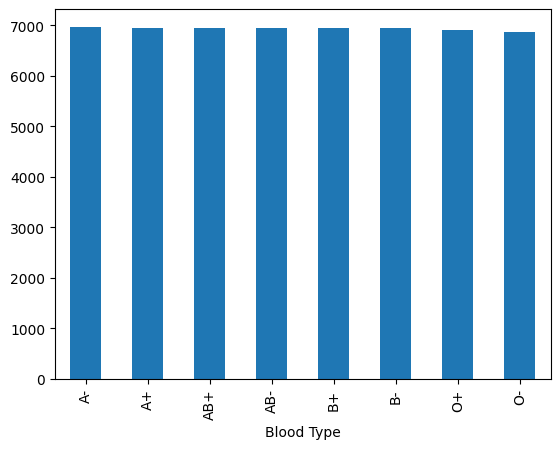

In [59]:
data['Blood Type'].value_counts().plot(kind = 'bar')

In [61]:
print(data.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'charges'],
      dtype='object')


In [61]:
data['Hospital'].value_counts()

Hospital
LLC Smith                     44
Ltd Smith                     39
Johnson PLC                   38
Smith Ltd                     37
Smith PLC                     36
                              ..
Hammond Ltd                    1
Moran Smith and Galloway,      1
Winters Martin, and Neal       1
James-Owen                     1
Marks, and Vazquez Jenkins     1
Name: count, Length: 39876, dtype: int64

<Axes: xlabel='Insurance Provider'>

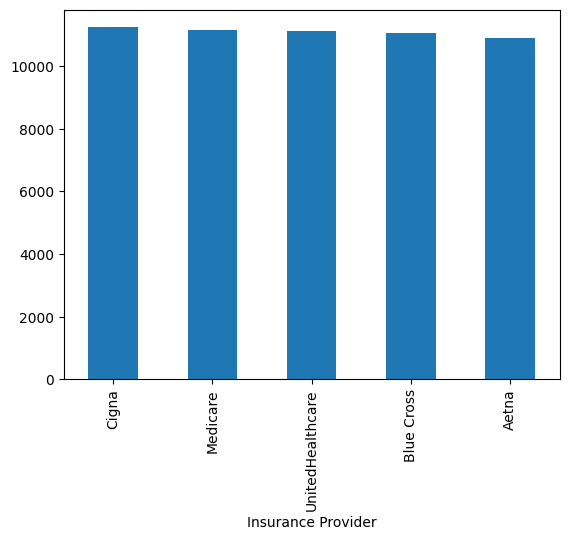

In [63]:
data['Insurance Provider'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Admission Type'>

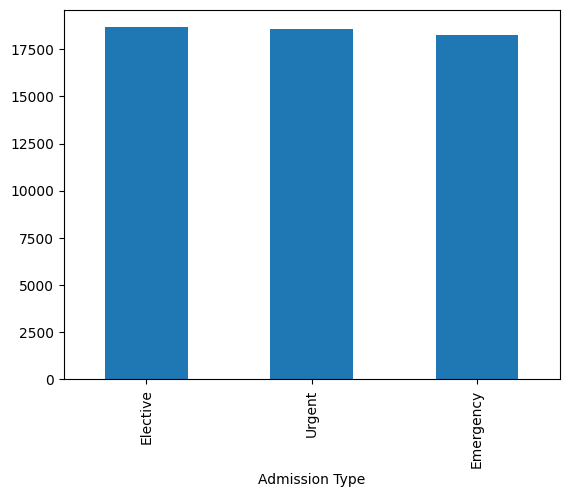

In [65]:
data['Admission Type'].value_counts().plot(kind = 'bar')

In [19]:
data['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [20]:
data['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [8]:
data['Medication'].value_counts()

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64

In [9]:
data['Doctor'].value_counts().sort_values()

Doctor
Deborah Sutton       1
Grace Garza          1
Micheal Saunders     1
Sara Marshall        1
Diane Foster         1
                    ..
Michael Johnson     20
James Smith         20
Robert Smith        22
John Smith          22
Michael Smith       27
Name: count, Length: 40341, dtype: int64

In [10]:
data['Blood Type'].value_counts()

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

In [24]:
data.select_dtypes(include=["number"]).skew().sort_values(ascending= False)

Billing Amount   -0.000978
Age              -0.005735
Room Number      -0.011200
dtype: float64

In [9]:
data['Age'].value_counts()

Age
38    897
37    893
57    887
34    864
80    864
     ... 
88     25
16     24
14     18
13     14
89      8
Name: count, Length: 77, dtype: int64

In [28]:
# Verify correct column name
print(data.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [ ]:

# Use the correct target column name (e.g., 'charges')
X = data.drop('charges', axis=1)
y = data['charges']


In [29]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

In [26]:
num_data = data.select_dtypes(include="number")
num_data

,Age,Billing Amount,Room Number
0,30,18856.281306,328
1,62,33643.327287,265
2,76,27955.096079,205
3,28,37909.782410,450
4,43,14238.317814,458
...,...,...,...
55495,42,2650.714952,417
55496,61,31457.797307,316
55497,38,27620.764717,347
55498,43,32451.092358,321


In [28]:
data['Doctor'].value_counts().sort_values()

Doctor
Deborah Sutton       1
Grace Garza          1
Micheal Saunders     1
Sara Marshall        1
Diane Foster         1
                    ..
Michael Johnson     20
James Smith         20
Robert Smith        22
John Smith          22
Michael Smith       27
Name: count, Length: 40341, dtype: int64

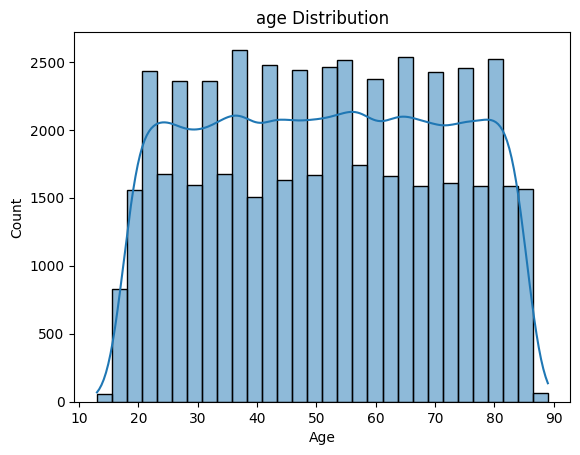

In [30]:
# Histogram of age distribution
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('age Distribution')
plt.show()

<Axes: ylabel='Billing Amount'>

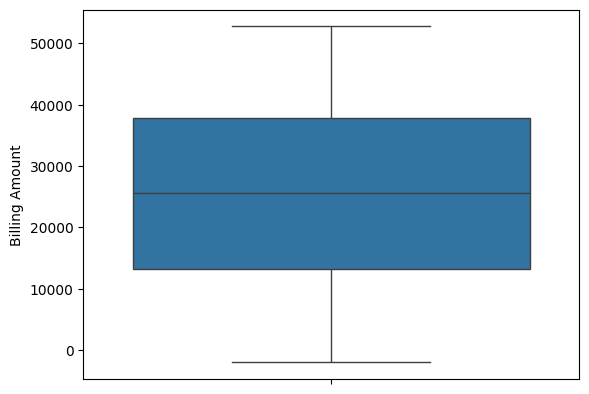

In [67]:
sns.boxplot(data['Billing Amount'])

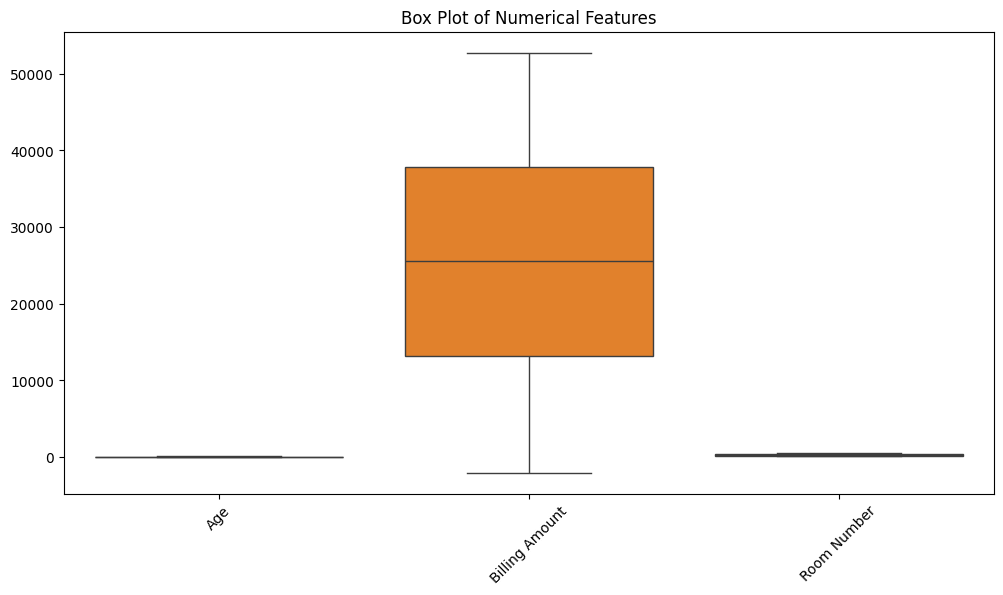

In [4]:
# Box plots for numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features")
plt.show()

In [34]:
cat_data = data.select_dtypes(include="object")
cat_data

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,Elective,2019-05-31,Ibuprofen,Abnormal


In [35]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [36]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('healthcare_dataset.csv')
healthcare.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


In [37]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 55500, dtype: int64

In [90]:
data.groupby(['Blood Type','Test Results','Gender','Admission Type'])['Test Results'].count()

Blood Type  Test Results  Gender  Admission Type
A+          Abnormal      Female  Elective          388
                                  Emergency         398
                                  Urgent            396
                          Male    Elective          395
                                  Emergency         361
                                                   ... 
O-          Normal        Female  Emergency         371
                                  Urgent            388
                          Male    Elective          383
                                  Emergency         374
                                  Urgent            359
Name: Test Results, Length: 144, dtype: int64

In [38]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Name
DAvId muNoZ          3
AlYSSA LoPeZ         2
kaTheRIne WeBSTer    2
DAvid JohNSon        2
DONnA vELASQuEz      2
                    ..
JOSepH PaUl          1
braDleY dAniEL       1
LiSa sIMPsoN         1
RoGER farRELl        1
jon EDwaRDS          1
Name: count, Length: 49992, dtype: int64
--
Gender
Male      27774
Female    27726
Name: count, dtype: int64
--
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64
--
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64
--
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64
--
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64
--
Medication
Lipitor        11140
Ibuprofen 

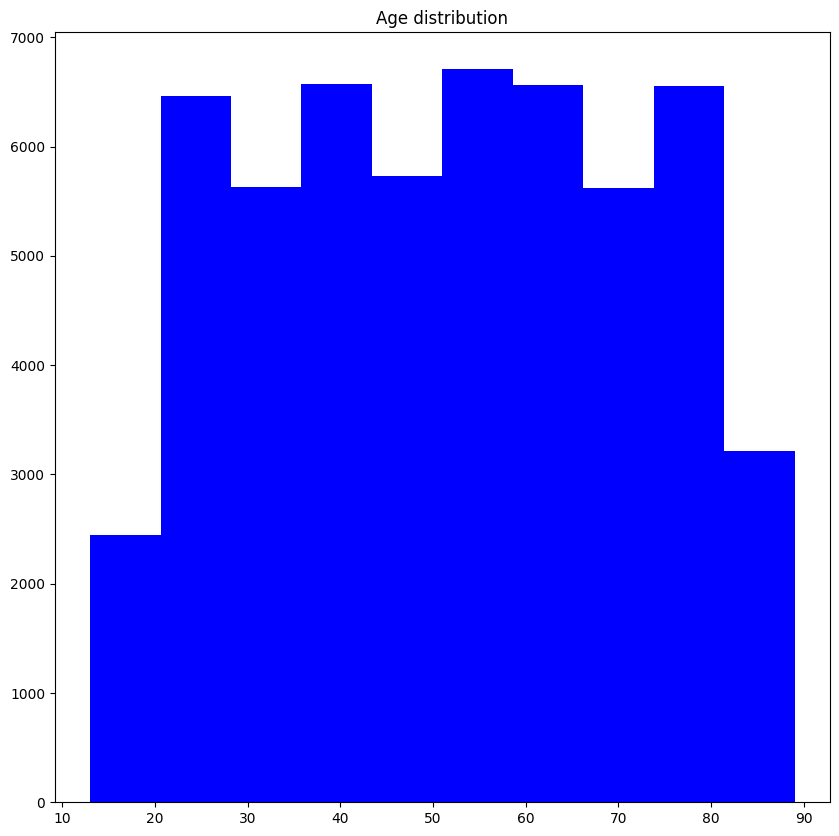

In [39]:
#Data Visualization
plt.figure(figsize=(10,10))
plt.hist(data['Age'],color='b')
plt.title("Age distribution");

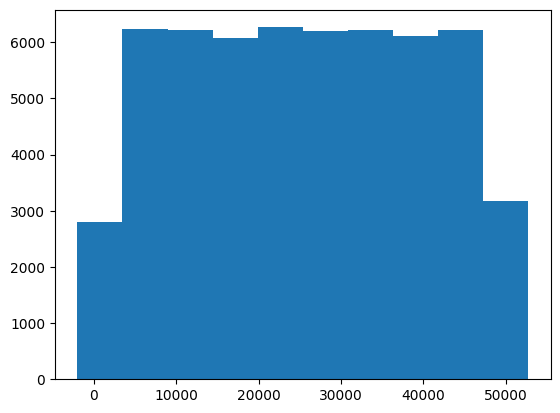

In [40]:
plt.hist(data['Billing Amount'])
plt.show()

In [123]:
columns_to_drop=['Name','Hospital','Date of Admission','Discharge Date','Room Number','Age','Gender','Billing Amount','Doctor']
cleaned_data=data.drop(columns_to_drop,axis=1)

In [124]:
cleaned_data

,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...
55495,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


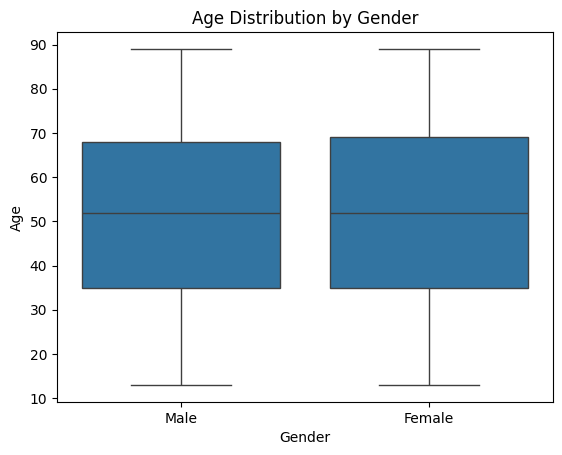

In [125]:
# Example of comparing gender with another variable (e.g., Age, Disease type)
sns.boxplot(x='Gender', y='Age', data=data)
plt.title("Age Distribution by Gender")
plt.show()

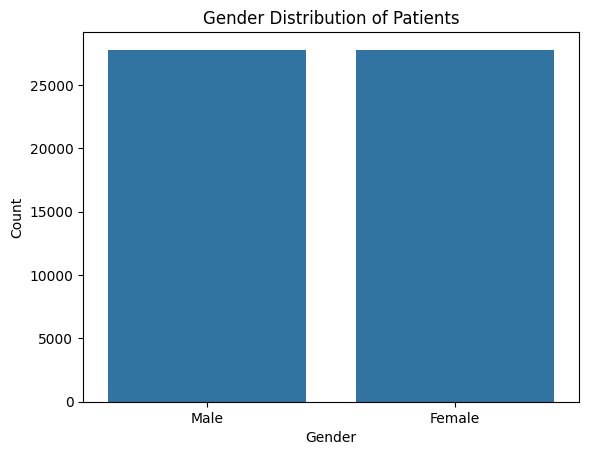

In [126]:
# Visualize the gender distribution using seaborn's countplot
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution of Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Skewness of numerical features:
 Age              -0.005735
Billing Amount   -0.000978
Room Number      -0.011200
dtype: float64


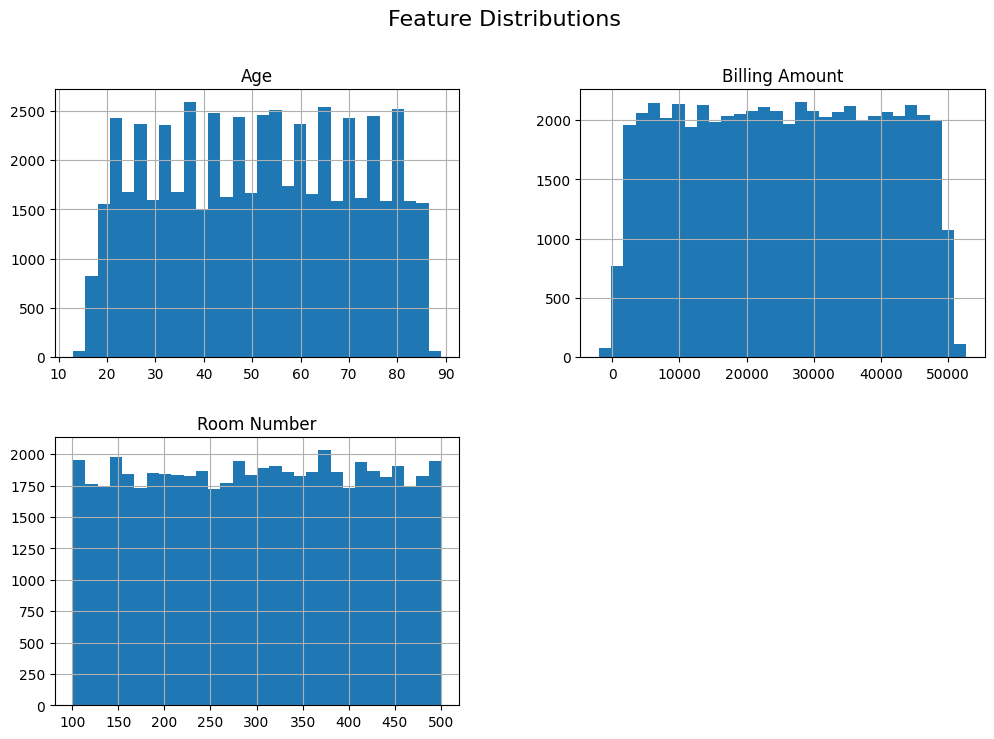

In [16]:
# Check skewness for numerical columns
skewness = data.select_dtypes(include=np.number).skew()
print("Skewness of numerical features:\n", skewness)

# Visualize skewness using histograms
data.hist(figsize=(12,8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


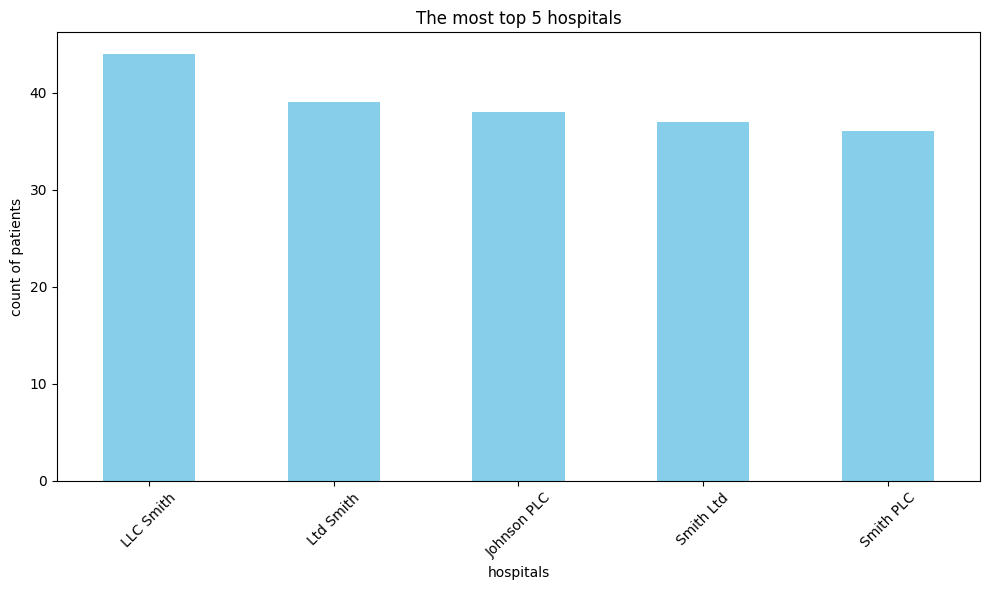

In [127]:
hospital_counts = data['Hospital'].value_counts()
top_5_hospitals = hospital_counts.head(5)
plt.figure(figsize=(10, 6))
top_5_hospitals.plot(kind='bar', color='skyblue')
plt.title('The most top 5 hospitals')
plt.xlabel('hospitals')
plt.ylabel('count of patients')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

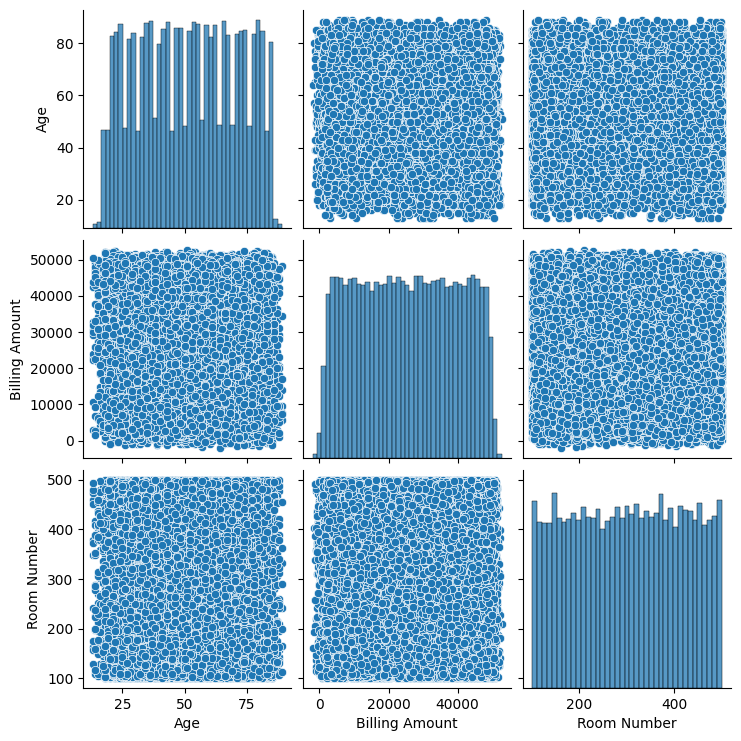

In [128]:
sns.pairplot(data)

In [129]:
columns_to_drop=['Name','Hospital','Date of Admission','Discharge Date','Room Number','Gender','Billing Amount','Doctor']
cleaned_data=data.drop(columns_to_drop,axis=1)
cleaned_data

,Age,Blood Type,Medical Condition,Insurance Provider,Admission Type,Medication,Test Results
0,30,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,62,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,76,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,28,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,43,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,42,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,61,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,38,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,43,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


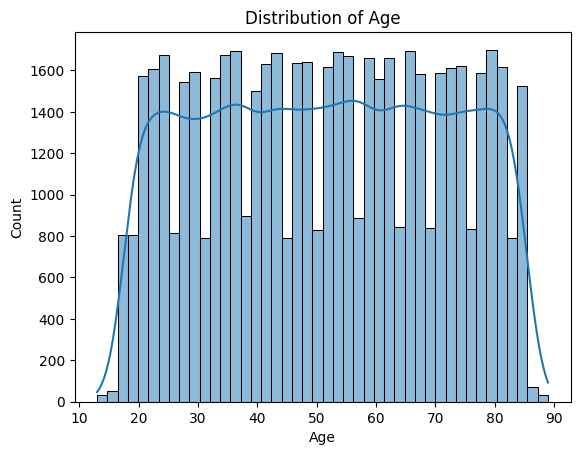

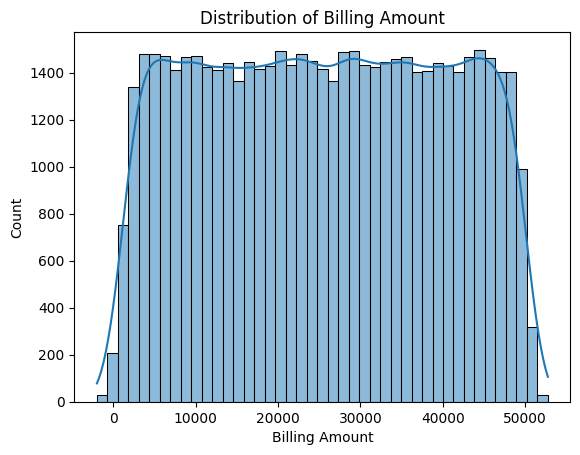

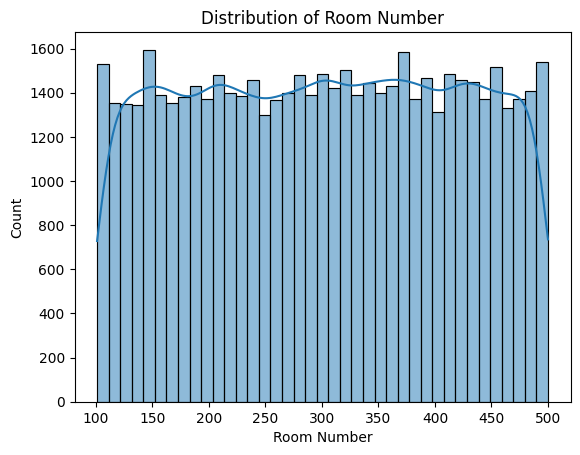

In [130]:
# Visualize the distribution of numerical features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

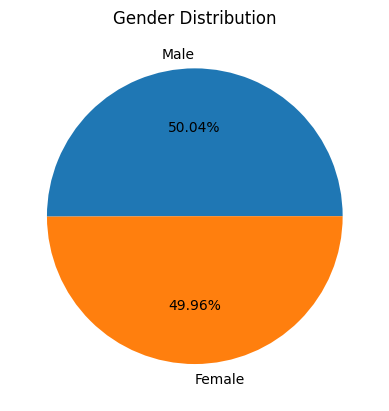

In [131]:
Male = data.loc[data['Gender'] == 'Male'].shape[0]
Female = data.loc[data['Gender'] == 'Female'].shape[0]
if pd.isna(Male):
    Male = 0
if pd.isna(Female):
    Female = 0
if Male == 0 and Female == 0:
    print("No data available for plotting.")
else:
    plt.pie([Male, Female], labels=['Male', 'Female'], autopct='%.2f%%')
    plt.title('Gender Distribution')
    plt.show()

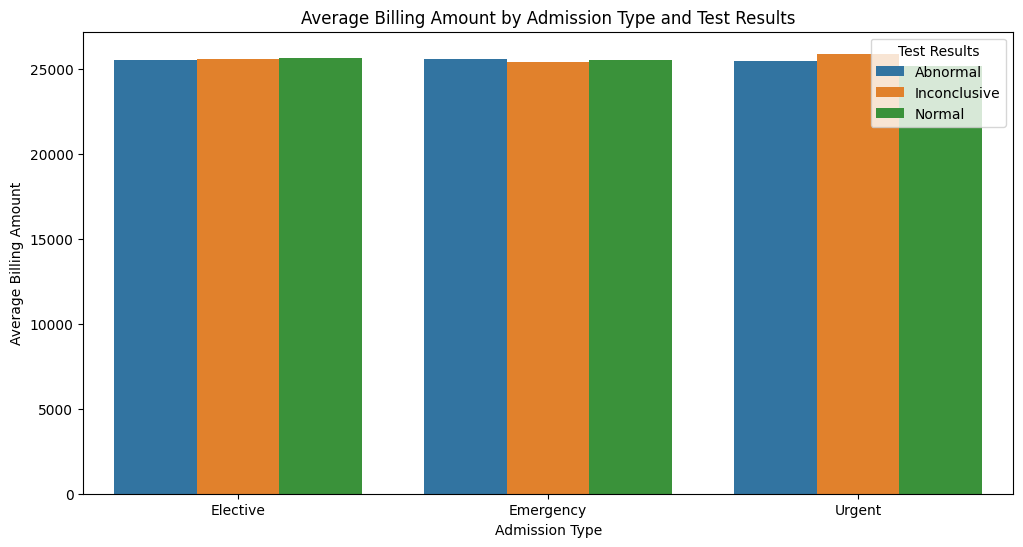

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt# KDE plot for Billing Amount by Test Results
avg_billing = data.groupby(['Admission Type', 'Test Results'])['Billing Amount'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_billing, x='Admission Type', y='Billing Amount', hue='Test Results')
plt.title('Average Billing Amount by Admission Type and Test Results')
plt.xlabel('Admission Type')
plt.ylabel('Average Billing Amount')
plt.show()

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures

In [134]:
data.groupby(['Billing Amount', 'Admission Type', 'Test Results'])['Test Results'].count()

Billing Amount  Admission Type  Test Results
-2008.492140    Urgent          Abnormal        1
-1660.009373    Elective        Normal          1
-1520.420555    Elective        Abnormal        1
-1428.843941    Urgent          Abnormal        1
-1316.618581    Emergency       Inconclusive    2
                                               ..
 52181.837792   Emergency       Inconclusive    1
 52211.852966   Urgent          Inconclusive    1
 52271.663747   Emergency       Normal          1
 52373.032374   Urgent          Inconclusive    2
 52764.276736   Elective        Normal          1
Name: Test Results, Length: 50000, dtype: int64

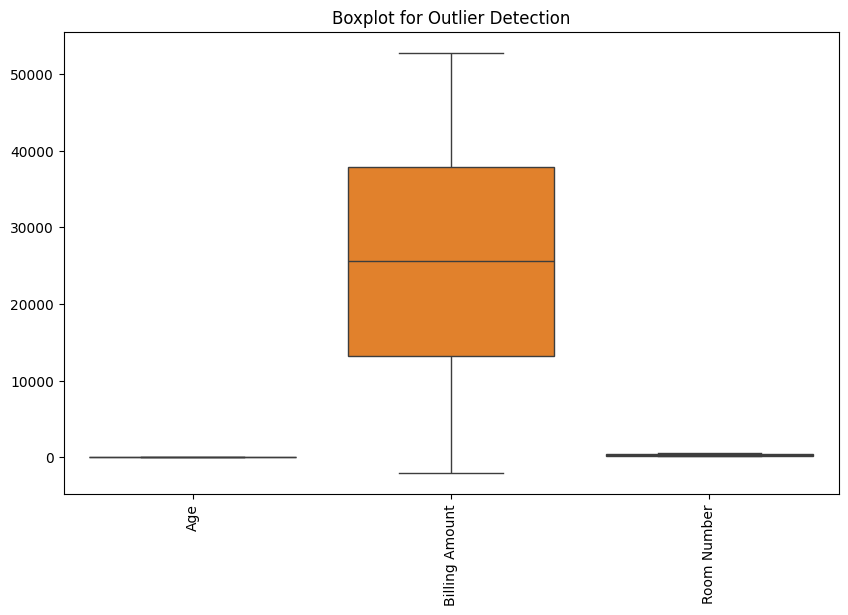

Outliers detected in each column:
 Age               0
Billing Amount    0
Room Number       0
dtype: int64


In [15]:
# Detect outliers using boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Detect outliers using Z-score
from scipy.stats import zscore

z_scores = np.abs(data.select_dtypes(include=np.number).apply(zscore))
outliers = (z_scores > 3).sum()
print("Outliers detected in each column:\n", outliers)
